In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target  #target variable to the dataframe



In [4]:
# Check for missing values
print(california_df.isnull().sum())

# Summary statistics
print(california_df.describe())




MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000

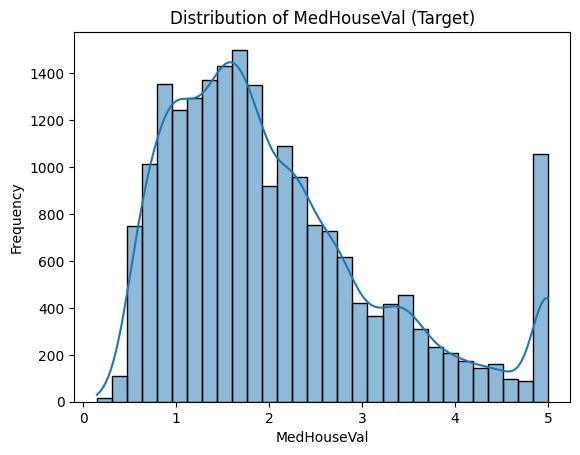

In [5]:
# Visualize the distribution of the target variable (MedHouseVal)
sns.histplot(california_df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of MedHouseVal (Target)')
plt.xlabel('MedHouseVal')
plt.ylabel('Frequency')
plt.show()



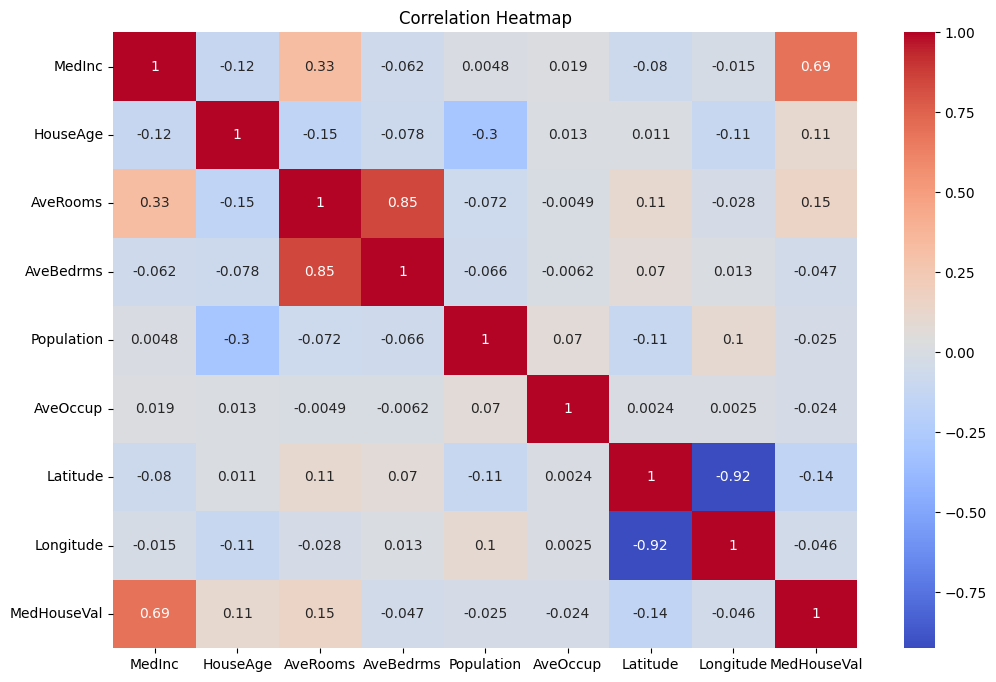

In [6]:
# Correlation heatmap to understand the relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(california_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Split the data into training and testing sets
X = california_df.drop('MedHouseVal', axis=1)
y = california_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Root Mean Squared Error (RMSE): 1.1368075668646518


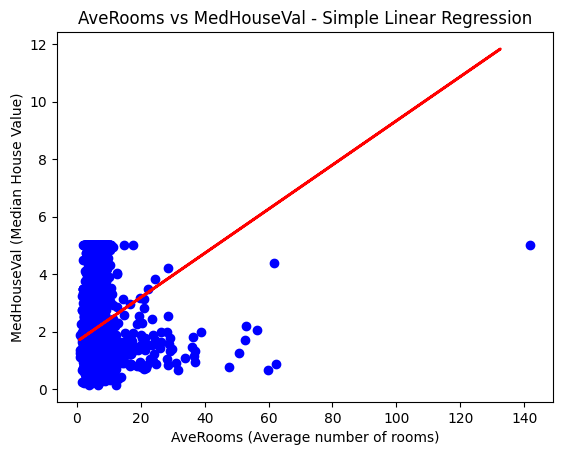

In [8]:
# Using the 'AveRooms' feature for Simple Linear Regression
X_rooms_train = X_train[['AveRooms']]
X_rooms_test = X_test[['AveRooms']]

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_rooms_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_rooms_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting the regression line
plt.scatter(X_rooms_train, y_train, color='blue')
plt.plot(X_rooms_test, y_pred, color='red', linewidth=2)
plt.title('AveRooms vs MedHouseVal - Simple Linear Regression')
plt.xlabel('AveRooms (Average number of rooms)')
plt.ylabel('MedHouseVal (Median House Value)')
plt.show()


Root Mean Squared Error (RMSE): 0.8014780485134463


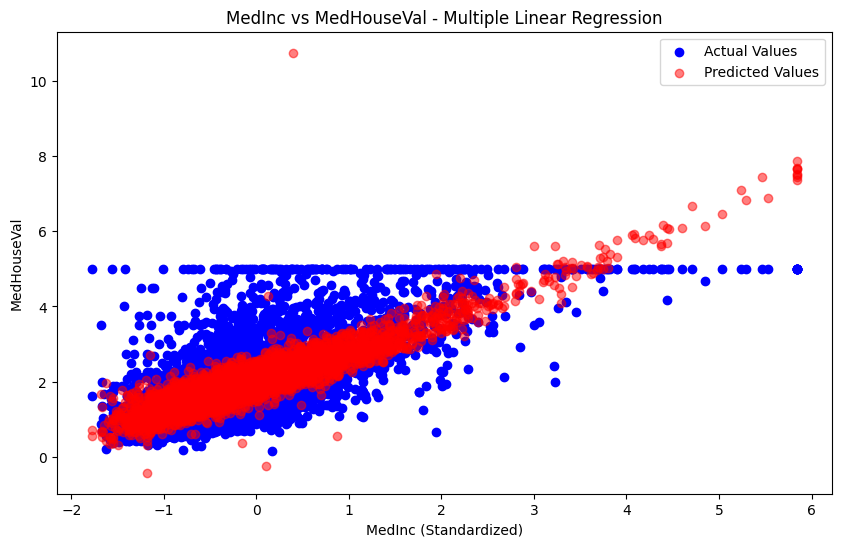

In [9]:
from sklearn.preprocessing import StandardScaler
features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms']
X = california_df[features]
y = california_df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

 #Make predictions on the test set
y_pred_poly = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

# Select the feature 'MedInc'
X_medinc_train = X_train_scaled[:, 0]  # Index 0 corresponds to 'MedInc'
X_medinc_test = X_test_scaled[:, 0]

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_medinc_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_medinc_test, y_pred_poly, color='red', label='Predicted Values', alpha=0.5)
plt.title('MedInc vs MedHouseVal - Multiple Linear Regression')
plt.xlabel('MedInc (Standardized)')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the 'MedInc' feature
X = california_df[['MedInc']]
y = california_df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the feature to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the model
poly_model = LinearRegression()

# Train the model
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE) for Polynomial Regression: {rmse}')


Root Mean Squared Error (RMSE) for Polynomial Regression: 0.838613896911573


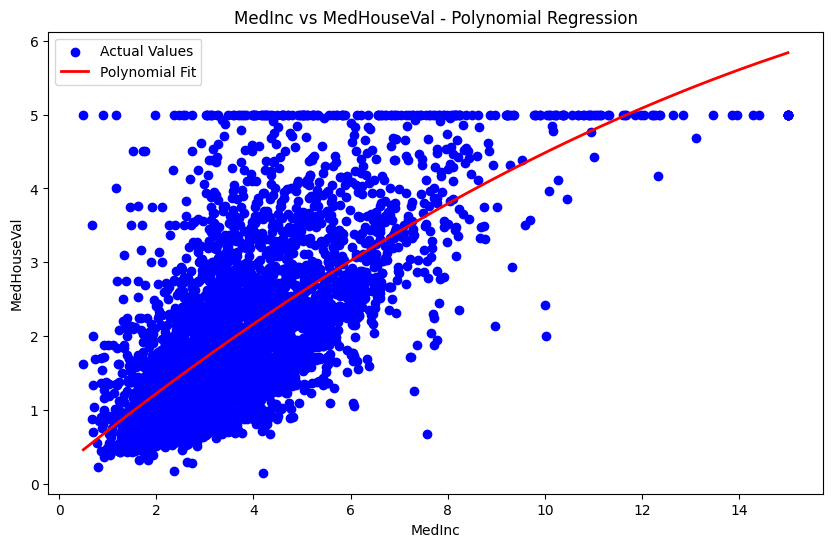

In [11]:
# Sort the values for plotting
sorted_idx = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_idx]
y_test_sorted = y_test.values[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot the polynomial regression fit
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Fit')
plt.title('MedInc vs MedHouseVal - Polynomial Regression')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()


In [12]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select multiple features for the model
features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms']
X = california_df[features]
y = california_df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_ridge = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model with a regularization strength (alpha)
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE) for Ridge Regression: {rmse}')


Root Mean Squared Error (RMSE) for Ridge Regression: 0.8014489352560952


In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

# Define a function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Metrics:')
    print(f'  MAE: {mae:.3f}')
    print(f'  MSE: {mse:.3f}')
    print(f'  RMSE: {rmse:.3f}')
    print(f'  R-squared: {r2:.3f}')
    print()

# Assuming y_pred variables are from each model
#  Linear Regression
evaluate_model(y_test, y_pred, 'Linear Regression')

#  Polynomial Regression
evaluate_model(y_test, y_pred_poly, 'Polynomial Regression')

#  Ridge Regression
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')


Linear Regression Metrics:
  MAE: 0.628
  MSE: 0.703
  RMSE: 0.839
  R-squared: 0.463

Polynomial Regression Metrics:
  MAE: 0.580
  MSE: 0.642
  RMSE: 0.801
  R-squared: 0.510

Ridge Regression Metrics:
  MAE: 0.580
  MSE: 0.642
  RMSE: 0.801
  R-squared: 0.510



In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Define a pipeline with PolynomialFeatures and Ridge
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Define the parameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],
    'ridge__alpha': [0.1, 1, 10, 100]
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train[['MedInc']], y_train)

print("Best Parameters for Polynomial Ridge:")
print(grid_search.best_params_)
print(f'Best Score: {-grid_search.best_score_:.3f}')


Best Parameters for Polynomial Ridge:
{'poly__degree': 4, 'ridge__alpha': 100}
Best Score: 0.681


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

# Initialize Grid Search
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)

print("Best Parameters for Ridge Regression:")
print(grid_search_ridge.best_params_)
print(f'Best Score: {-grid_search_ridge.best_score_:.3f}')


Best Parameters for Ridge Regression:
{'alpha': 10}
Best Score: 0.612


In [16]:
# Using the best models from grid search
best_poly_model = grid_search.best_estimator_
best_ridge_model = grid_search_ridge.best_estimator_

# Make predictions with the best models
y_pred_best_poly = best_poly_model.predict(X_test[['MedInc']])
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

# Evaluate the best models
evaluate_model(y_test, y_pred_best_poly, 'Best Polynomial Regression')
evaluate_model(y_test, y_pred_best_ridge, 'Best Ridge Regression')


Best Polynomial Regression Metrics:
  MAE: 0.622
  MSE: 0.698
  RMSE: 0.836
  R-squared: 0.467

Best Ridge Regression Metrics:
  MAE: 0.580
  MSE: 0.642
  RMSE: 0.801
  R-squared: 0.510



the best model to use would be thr ridge regression model
